# Baseball Case Study

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Data Exploration

In [5]:
df.shape

(30, 17)

In [6]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

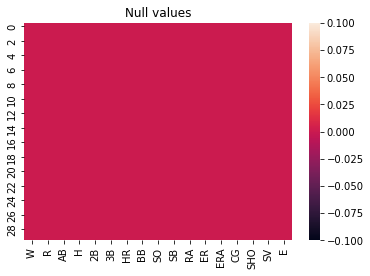

In [9]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Target variable

In [12]:
print(df['W'].value_counts())

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


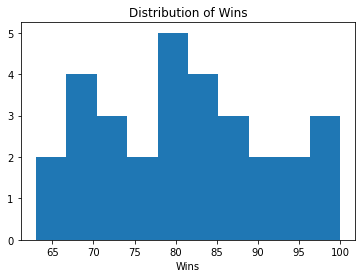

In [13]:
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

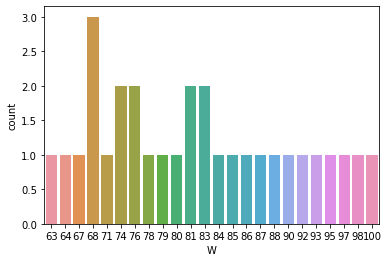

In [14]:
ax = sns.countplot(x="W",data=df)

# Checking Correlation

In [15]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

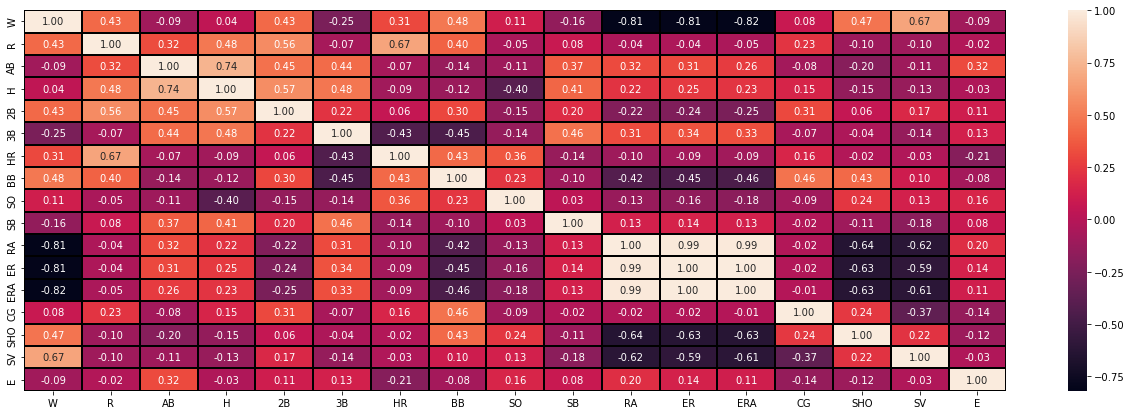

In [16]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [17]:
corr_matrix = df.corr().abs()
corr_matrix["W"].sort_values(ascending=False)

W      1.000000
ERA    0.819600
RA     0.812952
ER     0.809435
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
3B     0.251118
SB     0.157234
SO     0.111850
E      0.089485
AB     0.087947
CG     0.080533
H      0.037612
Name: W, dtype: float64

# data distribution among all the columns

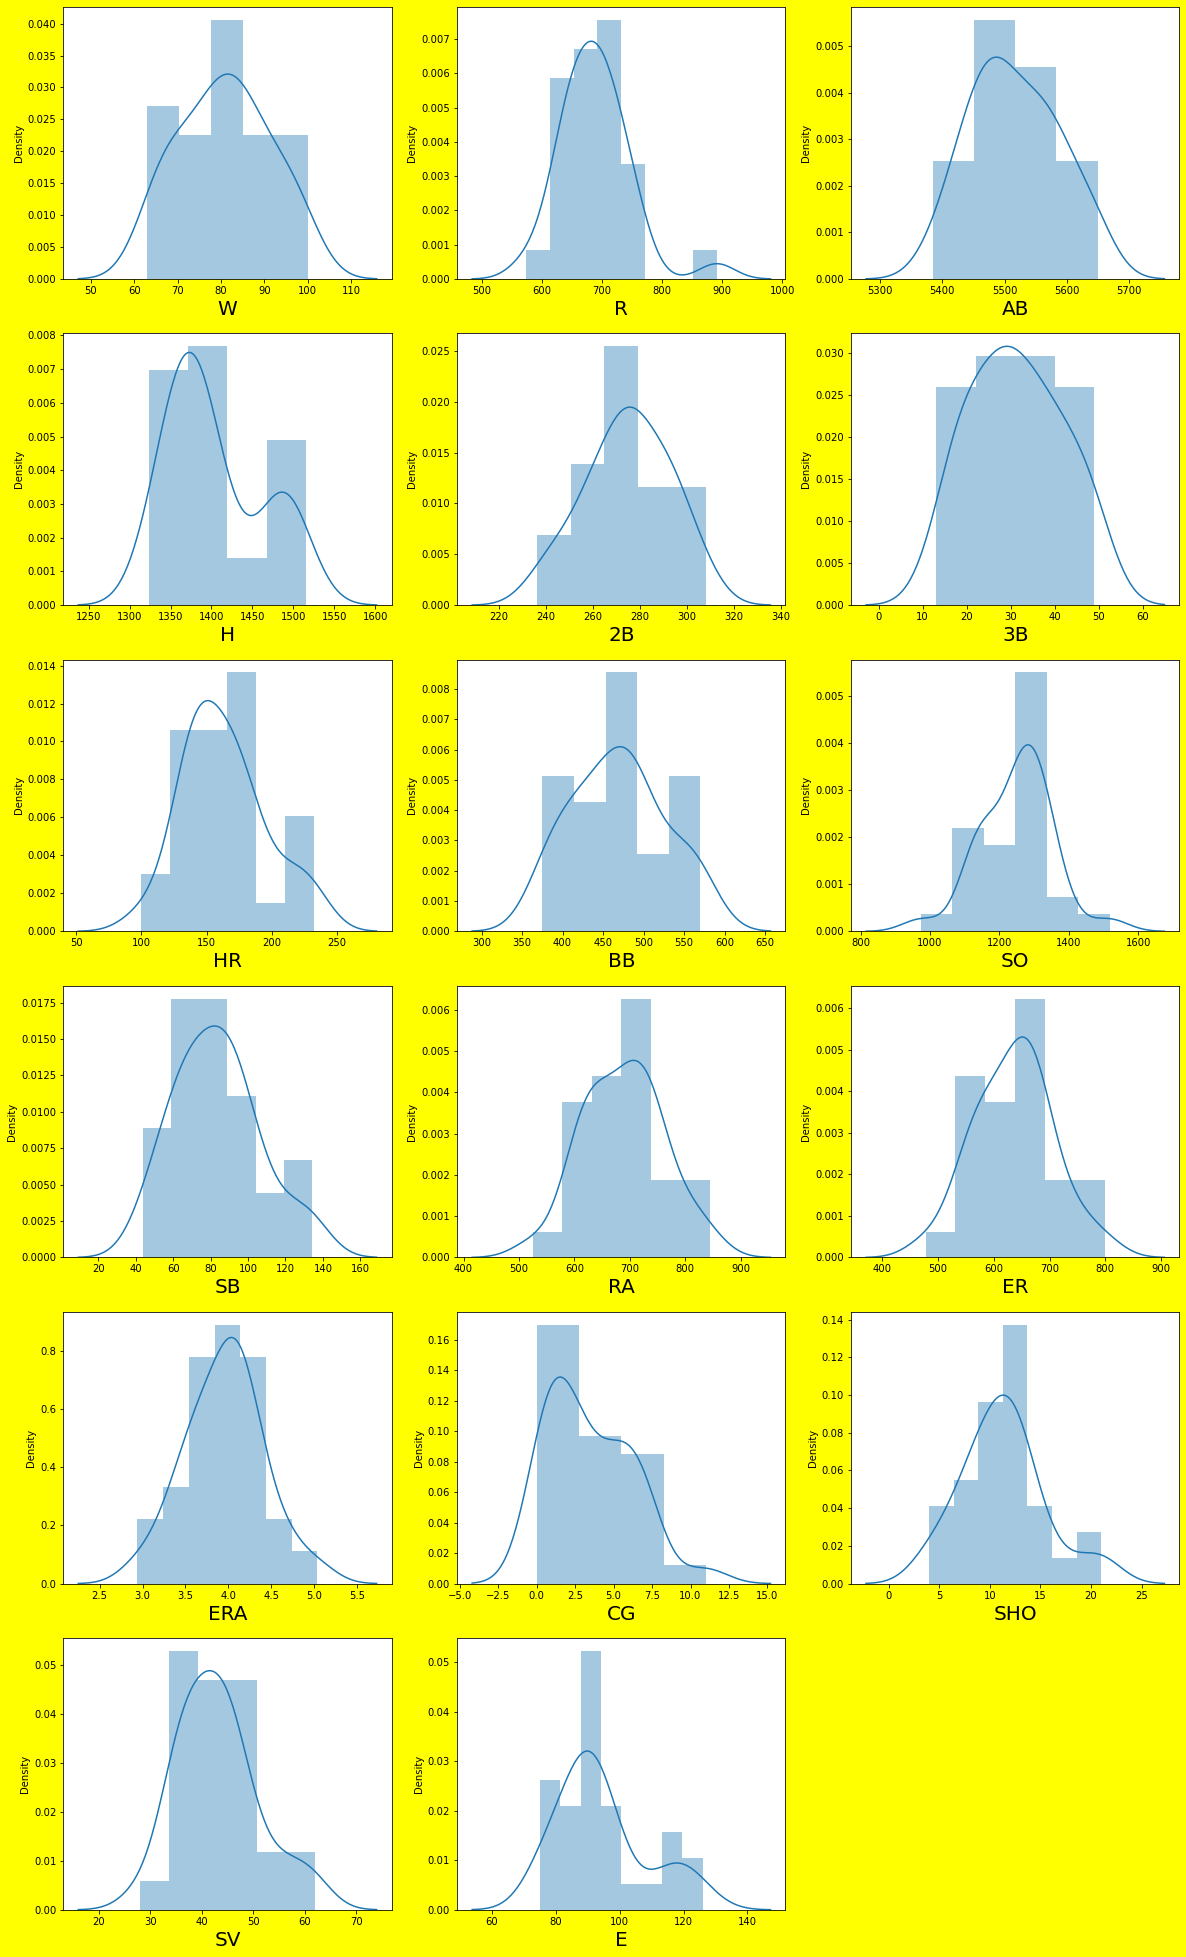

In [18]:
plt.figure(figsize=(20,35),facecolor='yellow')
plotnumber= 1

for column in df:
    if plotnumber<=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()


# Preprocessing

In [19]:
x = df.drop(columns=['W'])
y = df['W']

In [20]:
x.shape

(30, 16)

In [21]:
y.shape

(30,)

# Checking Skewness

In [22]:
x.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [23]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [28]:
x_new

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

In [30]:
pd.DataFrame(x_new, columns= x.columns).skew().sort_values(ascending=False)

E      0.063909
SO     0.041170
SHO    0.006560
ERA    0.001746
SV     0.000836
R      0.000000
AB     0.000000
H      0.000000
HR    -0.000065
ER    -0.001940
BB    -0.007760
RA    -0.008082
SB    -0.010455
2B    -0.035315
CG    -0.059785
3B    -0.072933
dtype: float64

In [29]:
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False)

E      0.063909
SO     0.041170
SHO    0.006560
ERA    0.001746
SV     0.000836
R      0.000000
AB     0.000000
H      0.000000
HR    -0.000065
ER    -0.001940
BB    -0.007760
RA    -0.008082
SB    -0.010455
2B    -0.035315
CG    -0.059785
3B    -0.072933
dtype: float64

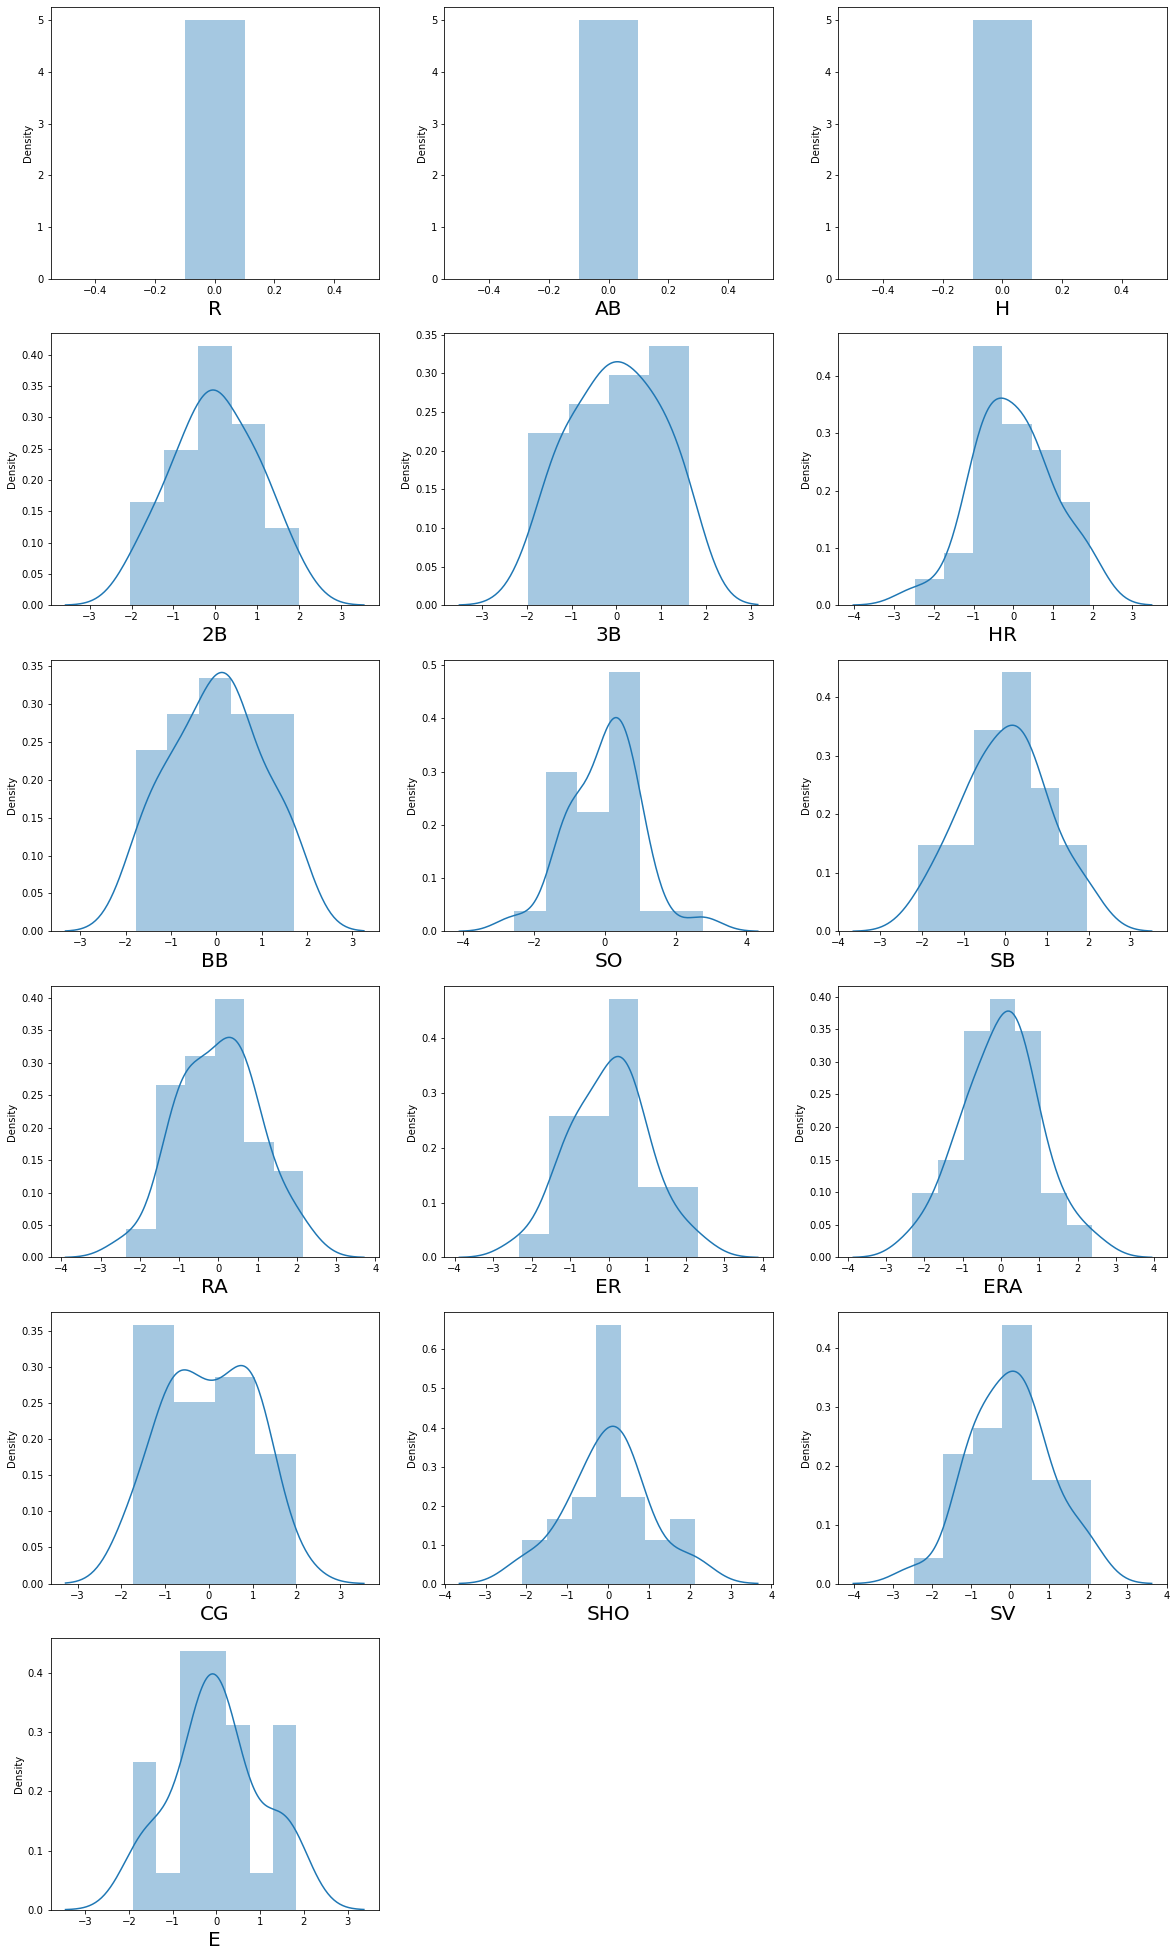

In [31]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [32]:
x.shape

(30, 16)

In [33]:
y.shape

(30,)

# Checking outliers

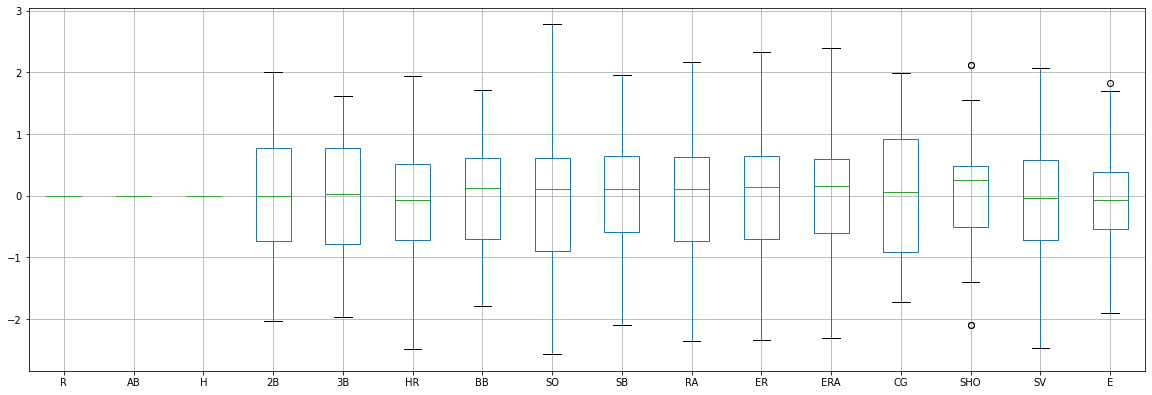

In [34]:
x.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

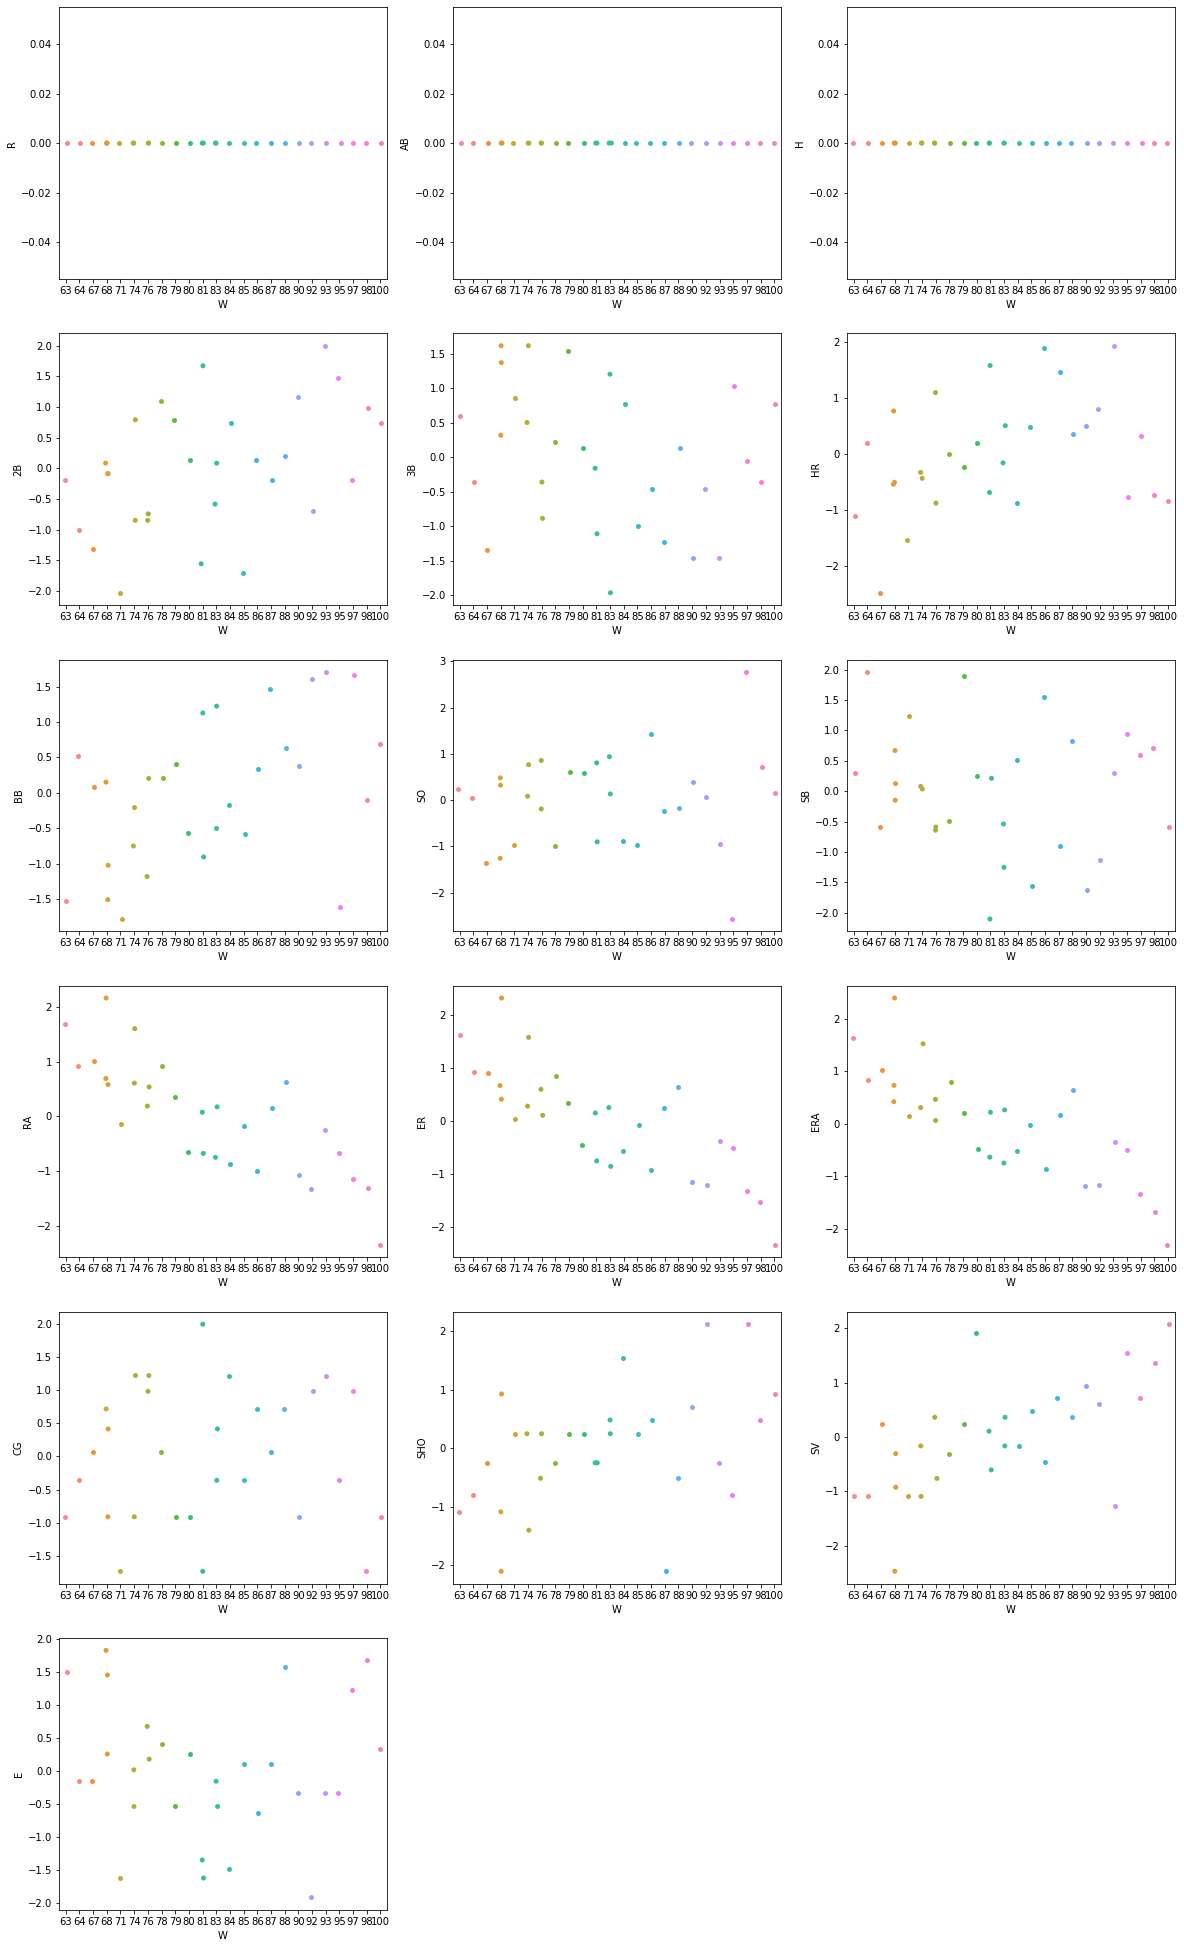

In [35]:
plt.figure(figsize=(20,35))
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax= plt.subplot(6,3,plotnumber)
        sns.stripplot(y,x[column]) 
    plotnumber+=1
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [37]:
x_scaled.shape

(30, 16)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns

#let's check the values
vif

,vif,features
0,NaN,R
1,NaN,AB
2,NaN,H
3,2.221041,2B
4,2.697792,3B
5,2.867884,HR
6,3.331177,BB
7,2.321817,SO
8,1.888334,SB
9,177.760829,RA


In [40]:
x = x.drop(columns=['ERA','ER'])

In [41]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=14)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Feaure_Name','Score']

print(feature_scores.nlargest(14,'Score'))

   Feaure_Name     Score
13           E  4.270923
9           RA  2.515997
8           SB  2.122715
12          SV  1.724399
7           SO  1.510752
5           HR  1.069737
6           BB  1.017882
11         SHO  0.954816
3           2B  0.889863
4           3B  0.828419
10          CG  0.449082
0            R       NaN
1           AB       NaN
2            H       NaN


In [42]:
x = x.drop(columns=['CG'])

In [43]:
x.shape

(30, 13)

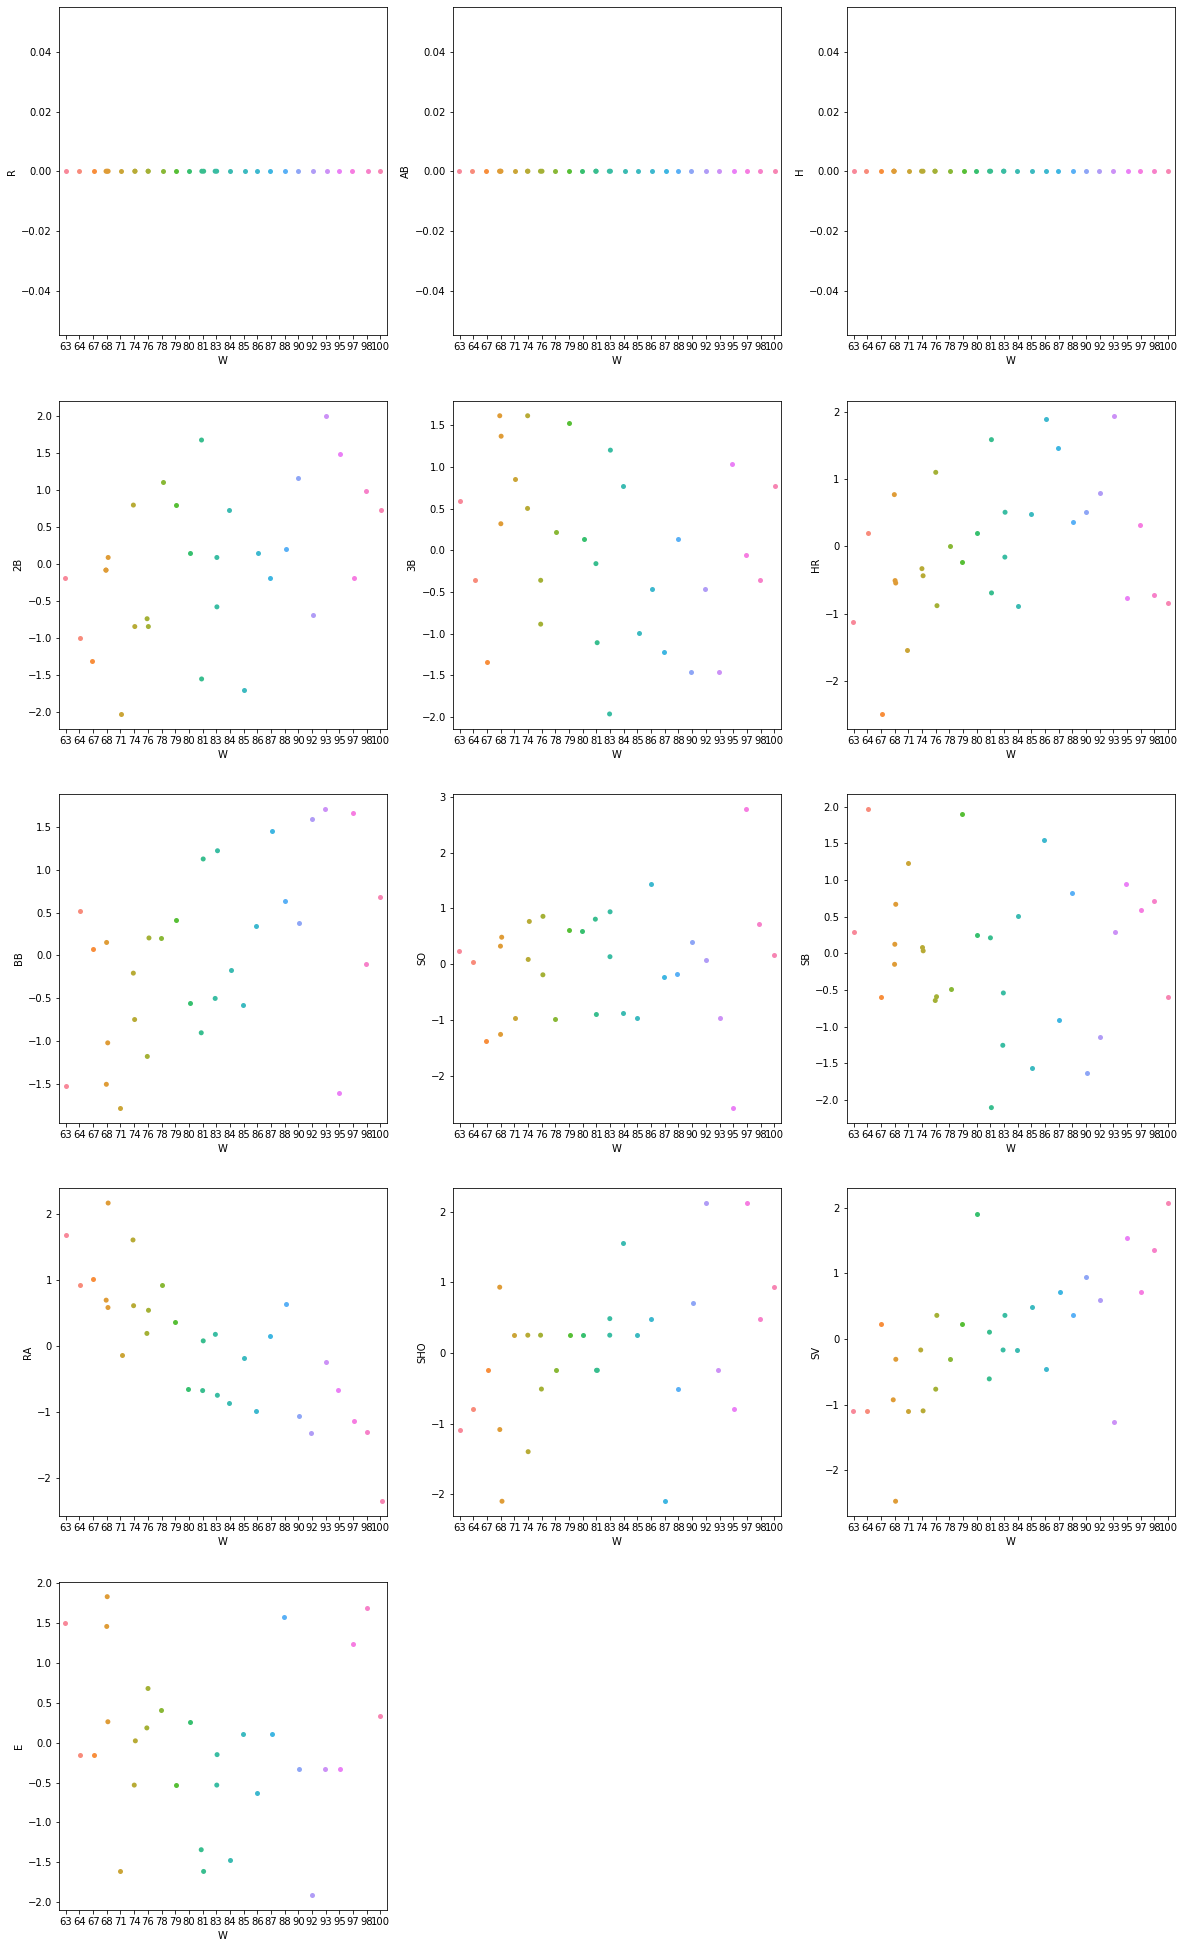

In [44]:
plt.figure(figsize=(20,35))
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax= plt.subplot(5,3,plotnumber)
        sns.stripplot(y,x[column]) 
    plotnumber+=1
plt.show()

# Applying Regression models and finding best fit model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9524750802394873
At random state 0,the testing accuracy is:- -0.760634501563807


At random state 1,the training accuracy is:- 0.9325936109077891
At random state 1,the testing accuracy is:- 0.48559049686266886


At random state 2,the training accuracy is:- 0.9376695554027067
At random state 2,the testing accuracy is:- -0.5064563845452235


At random state 3,the training accuracy is:- 0.9302688258513092
At random state 3,the testing accuracy is:- 0.5952185843189182


At random state 4,the training accuracy is:- 0.8543265461300139
At random state 4,the testing accuracy is:- 0.7762608264343063


At random state 5,the training accuracy is:- 0.896190719433646
At random state 5,the testing accuracy is:- 0.6588869519052041


At random state 6,the training accuracy is:- 0.886039641806652
At random state 6,the testing accuracy is:- 0.552609343094564


At random state 7,the training accuracy is:- 0.8796094231132693
At random state 7,the testing accu

In [46]:
model_name=[]
r2_scores=[]
rmse_value=[]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=99)

In [48]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [49]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

49.511421340545766
MAE: 6.748493899090549
MSE: 68.3278764524614
RMSE: 8.26606777448996


In [50]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv=LassoCV(alphas=None, max_iter=1000, normalize=True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.6338033137802198

In [51]:
ridgecv=RidgeCV(normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.6121879901537628

In [52]:
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

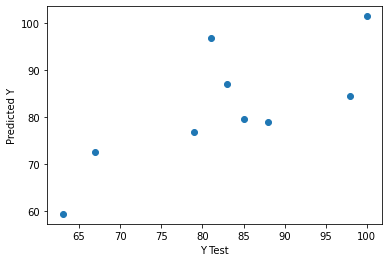

In [53]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [55]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )


-10.098522167487678
MAE: 9.666666666666666
MSE: 149.0
RMSE: 12.206555615733702


In [57]:
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

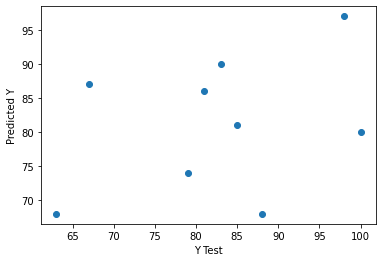

In [58]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [59]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)

In [60]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

46.3731773399015
MAE: 7.514444444444442
MSE: 72.57496666666663
RMSE: 8.51909423980429


In [61]:
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

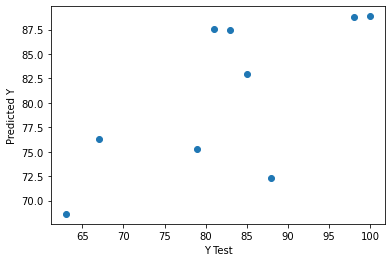

In [62]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [63]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [64]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

5.153494314238893
MAE: 8.920386153753348
MSE: 128.35893769473003
RMSE: 11.329560348695356


In [65]:
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [66]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [67]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

45.34436157467913
MAE: 7.803571428571429
MSE: 73.9672973356009
RMSE: 8.600424253233145


In [68]:
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [69]:
Regression_Scores

,Model Name,r2 Score,RMSE
0,Linear Regression,49.511421,8.266068
1,Decision Tree Regressor,-10.098522,12.206556
2,Random Forest Regressor,46.373177,8.519094
3,SVR,5.153494,11.329560
4,ADA Boost,45.344362,8.600424


# Concluding Remarks

,Y Test,Y Pred
23,67,77.000
24,63,69.125
16,98,92.000
12,85,82.500
21,83,90.000


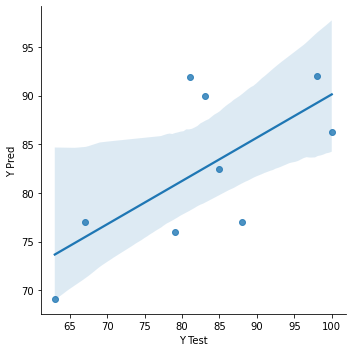

In [70]:
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

In [71]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x,y,cv=5)
print("Cross validation score of Linear Regression Model", np.abs(scr.mean()))
scr1 = cross_val_score(ada,x,y,cv=5)
print("Cross validation score of Ada Boost Regressor Model", np.abs(scr1.mean()))
scr2 = cross_val_score(rdr,x,y,cv=5)
print("Cross validation score of Random Forest Regressor Model", np.abs(scr2.mean()))
scr3 = cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of Decision Tree Model", np.abs(scr3.mean()))
scr4 = cross_val_score(svr,x,y,cv=5)
print("Cross validation score of SVR Model", np.abs(scr4.mean()))

Cross validation score of Linear Regression Model 0.021661475514382023
Cross validation score of Ada Boost Regressor Model 0.6652902557135014
Cross validation score of Random Forest Regressor Model 0.6345630267158193
Cross validation score of Decision Tree Model 2.521003138951752
Cross validation score of SVR Model 0.4215817857904107


In [72]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [73]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

14.81943916699369

# SAVE THE MODEL

In [74]:
import joblib
joblib.dump(clf.best_params_,"BaseBall.pkl")

['BaseBall.pkl']